In [23]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
dfzero = pd.read_csv('../zero_shot_dev_results.csv')
dffew = pd.read_csv('../few_shot_dev_results.csv')

In [25]:
dfzero = dfzero.drop(columns=['file'])

dfzero = dfzero[dfzero['split'].str.contains('dev')]

# format model to split on slash if it exists
dfzero['model'] = dfzero['model'].str.split('/').str[-1]

dfzero.head()

,model,prompt_type,prompt_index,split,run,TP,FP,FN,Prec,Rec,F0.5,GLEU,prompt_template,prompt_type_index
0,opt-iml-max-30b,0-shot,6,jfleg-dev,1,906,183,933,0.8320,0.4927,0.7312,0.499937,You are a grammatical error correction tool. Y...,0-shot_6
1,opt-iml-max-30b,0-shot,10,jfleg-dev,1,884,175,927,0.8347,0.4881,0.7309,0.500910,Reply with a corrected version of the input se...,0-shot_10
2,opt-iml-max-30b,0-shot,7,jfleg-dev,1,820,169,975,0.8291,0.4568,0.7129,0.486461,You are a grammatical error correction tool. Y...,0-shot_7
3,gpt-4-0613,0-shot,6,jfleg-dev,1,1473,654,899,0.6925,0.6210,0.6769,0.574767,system: You are a grammatical error correction...,0-shot_6
4,gpt-4-0613,0-shot,7,jfleg-dev,1,1456,654,910,0.6900,0.6154,0.6737,0.573003,system: You are a grammatical error correction...,0-shot_7


In [26]:
dfzero.prompt_type_index.unique()

array(['0-shot_6', '0-shot_10', '0-shot_7', '0-shot_8', '0-shot_5',
       '0-shot_11', '0-shot_3'], dtype=object)

In [27]:
# process few-shot results

# filter to rows where split contains 'dev'
dffew = dffew[dffew['split'].str.contains('dev')]

# format model to split on slash if it exists
dffew['model'] = dffew['model'].str.split('/').str[-1]

dffew.head()

,model,prompt_type,prompt_index,split,run,TP,FP,FN,Prec,Rec,F0.5,GLEU,prompt_template,prompt_type_index
0,opt-iml-max-30b,3-shot,1,jfleg-dev,1,839,192,992,0.8138,0.4582,0.7045,0.498200,Reply with a corrected version of the input se...,3-shot_1
1,opt-iml-max-30b,2-shot-Coyne,1,jfleg-dev,1,919,264,957,0.7768,0.4899,0.6954,0.506410,Reply with a corrected version of the input se...,2-shot-Coyne_1
2,opt-iml-max-30b,3-shot,3,jfleg-dev,1,821,211,1005,0.7955,0.4496,0.6895,0.494307,You are an English language teacher. A student...,3-shot_3
3,opt-iml-max-30b,1-shot,3,jfleg-dev,1,710,176,1018,0.8014,0.4109,0.6734,0.470543,You are an English language teacher. A student...,1-shot_3
4,opt-iml-max-30b,1-shot,1,jfleg-dev,1,637,128,1038,0.8327,0.3803,0.6727,0.461363,Reply with a corrected version of the input se...,1-shot_1


In [28]:
dffew.prompt_type_index.unique()

array(['3-shot_1', '2-shot-Coyne_1', '3-shot_3', '1-shot_3', '1-shot_1',
       '3-shot_2', '2-shot_2', '4-shot_1', '4-shot_3', '2-shot_1',
       '1-shot_2', '4-shot_2', '2-shot_3'], dtype=object)

In [29]:
# for dffew, we select prompt_index == 2
dffew = dffew[dffew.prompt_index == 2]

# for dfzero, we select prompt_index == 6
dfzero = dfzero[dfzero.prompt_index == 6]

In [30]:
# concatenate zero-shot and few-shot results
df = pd.concat([dfzero, dffew])

In [31]:
# remove row where 'gpt4' in model
df = df[~df['model'].str.contains('gpt-4')]

In [32]:
# set prompt_index == 2 for all rows
df['prompt_index'] = 2
df.prompt_index.unique()

array([2])

In [33]:
# select a split
split = 'fce-dev'
df = df[df.split == split]

In [34]:
# format prompt_type to split on hyphen if it exists
df['prompt_type'] = df['prompt_type'].str.split('-').str[0]

In [35]:
df.head()

,model,prompt_type,prompt_index,split,run,TP,FP,FN,Prec,Rec,F0.5,GLEU,prompt_template,prompt_type_index
67,flan-t5-xxl,0,2,fce-dev,1,669,434,2814,0.6065,0.1921,0.4237,NaN,You are a grammatical error correction tool. Y...,0-shot_6
80,StableBeluga2,0,2,fce-dev,1,1520,2335,1963,0.3943,0.4364,0.4021,NaN,### System: You are a grammatical error correc...,0-shot_6
85,opt-iml-max-30b,0,2,fce-dev,1,653,556,2830,0.5401,0.1875,0.3925,NaN,You are a grammatical error correction tool. Y...,0-shot_6
99,gpt-3.5-turbo-0613,0,2,fce-dev,1,1584,2772,1899,0.3636,0.4548,0.3788,NaN,system: You are a grammatical error correction...,0-shot_6
101,falcon-40b-instruct,0,2,fce-dev,1,1199,1933,2284,0.3828,0.3442,0.3744,NaN,You are a grammatical error correction tool. Y...,0-shot_6


In [36]:
# sort dataframe by prompt_type and F0.5
df = df.sort_values(by=['prompt_type', 'F0.5'], ascending=[True, False])

In [37]:
# select rows where prompt_type == 0
df_0_shot = df[df.prompt_type == '0']

In [38]:
# create new column F0.5-delta
df['F0.5-delta'] = df['F0.5']
def calculate_diff(row):
    # if row['prompt_type'] == '0':
    #     return row['F0.5']
    # else:
    return row['F0.5'] - df_0_shot[df_0_shot.model == row.model]['F0.5'].values[0]

df['F0.5-delta'] = df.apply(calculate_diff, axis=1)

In [39]:
# print dataframe where model == flan-t5-xxl
df[df.model == 'flan-t5-xxl'].head()

,model,prompt_type,prompt_index,split,run,TP,FP,FN,Prec,Rec,F0.5,GLEU,prompt_template,prompt_type_index,F0.5-delta
67,flan-t5-xxl,0,2,fce-dev,1,669,434,2814,0.6065,0.1921,0.4237,NaN,You are a grammatical error correction tool. Y...,0-shot_6,0.0000
113,flan-t5-xxl,1,2,fce-dev,1,743,466,2740,0.6146,0.2133,0.4466,NaN,You are a grammatical error correction tool. Y...,1-shot_2,0.0229
119,flan-t5-xxl,2,2,fce-dev,1,718,464,2765,0.6074,0.2061,0.4372,NaN,You are a grammatical error correction tool. Y...,2-shot_2,0.0135
153,flan-t5-xxl,3,2,fce-dev,1,713,606,2770,0.5406,0.2047,0.4070,NaN,You are a grammatical error correction tool. Y...,3-shot_2,-0.0167
157,flan-t5-xxl,4,2,fce-dev,1,694,583,2789,0.5435,0.1993,0.4039,NaN,You are a grammatical error correction tool. Y...,4-shot_2,-0.0198


In [40]:
# rename model with dictionary mapping
model_name_map = {}
model_name_map['gpt-4-0613'] = 'GPT-4-0613'
model_name_map['gpt-3.5-turbo-0613'] = 'GPT-3.5T-0613'
model_name_map['command'] = 'Cohere'
model_name_map['opt-iml-max-30b'] = 'OPT'
model_name_map['flan-t5-xxl'] = 'Flan-T5'
model_name_map['falcon-40b-instruct'] = 'Falcon'
model_name_map['StableBeluga2'] = 'Stablebeluga2'
model_name_map['Llama-2-70b-chat-hf'] = 'Llama2'
model_name_map['InstructPalmyra-20b'] = 'InstructPalmyra'
model_name_map['bloomz-7b1'] = 'Bloomz'

df['model'] = df['model'].replace(model_name_map)


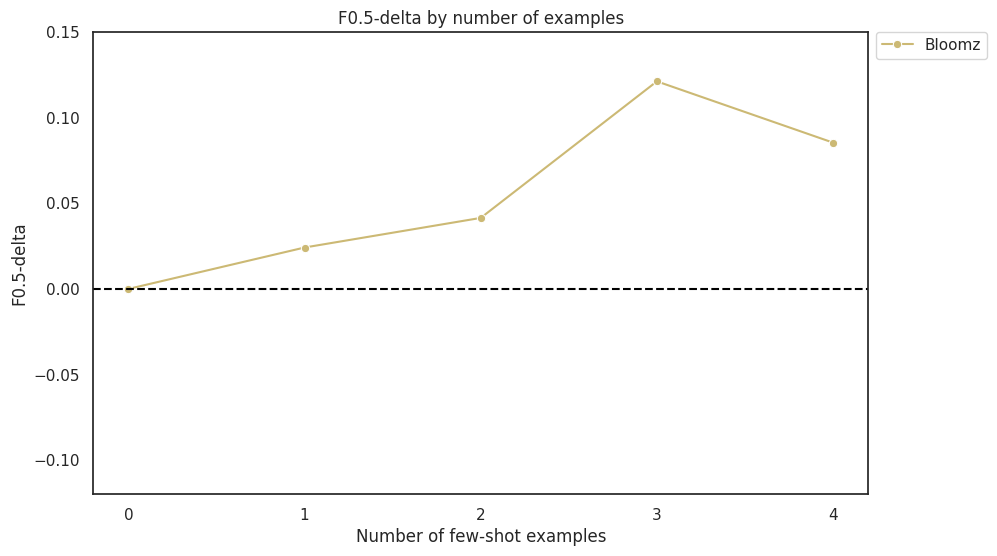

In [50]:
# plot model and f0.5 as line plot
sns.set_theme(style="white")
plt.figure(figsize=(10, 6))

colors = sns.color_palette(n_colors=len(df.model.unique()))
pal = dict(zip(df.model.unique(), colors))
# filter df
# select only rows where model == Bloomz
dfplot = df.copy()
dfplot = dfplot[dfplot.model == 'Bloomz']
# dfplot = dfplot[dfplot.prompt_type == '0']

ax = sns.lineplot(data=dfplot, x='prompt_type', y='F0.5-delta', hue='model', marker='o', palette=pal)
plt.title('F0.5-delta by number of examples')
# move legend to the right and outside
plt.legend(bbox_to_anchor=(1, 1.018), loc='upper left')
# x-axis
plt.xlabel('Number of few-shot examples')
# x-axis ticks
plt.xticks(np.arange(0, 5, 1), labels=['0', '1', '2', '3', '4'])

# add line at y=0
plt.axhline(y=0, color='black', linestyle='--')

# set y-axis limits
plt.ylim(-0.12, 0.15)

plt.show()
